In [45]:
'''Supplementary Figure 1: Profiling STRs in GTEx samples
Number of calls/sample
Number of samples/locus
Heterozygosity vs. previously reported in SGDP (mgymrek TODO)
Stutter model summary
'''
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

CALLS = '/storage/szfeupe/Runs/GTEx_estr/Normalized_Genotypes/STR_Raw_Gen.chr'
CHR = [str(x) for x in range(1,23)]+['X','Y']

In [46]:
#Number of calls/sample
frames = []
for C in CHR:
    chrom = pd.read_csv(CALLS + C, sep='\t')
    chrom = chrom.convert_objects(convert_numeric=True)
    frames.append(chrom)
    
Calls = pd.concat(frames)
COUNTS = Calls.count()
Y = list(COUNTS)
X = list(COUNTS.index)

/usr/lib/python3.4/site-packages/ipykernel/__main__.py:8: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
/usr/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (6,30,47,80,144) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


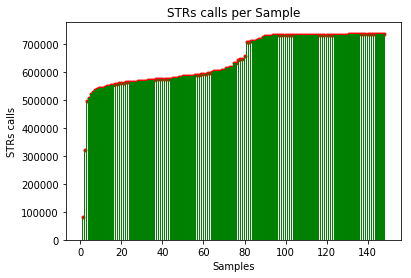

In [50]:
plt.bar([x for x in range(1,len(X[1:]))],sorted(list(Y[2:])),color='g') #,marker='.')#,edgecolors='b')
plt.scatter([x for x in range(1,len(X[1:]))],sorted(list(Y[2:])),color='r', marker='.')#,edgecolors='b')
plt.ylabel('STRs calls')
plt.xlabel('Samples')
plt.title('STRs calls per Sample')
plt.show()

In [51]:
#Number of samples/locus
Calls['locus'] = Calls.count(axis=1)
Calls['locus'] -=2
X= sorted(set(list(Calls['locus'])))             #samples
Y = [list(Calls['locus']).count(x) for x in X]   #Numberof locus with that mny sample

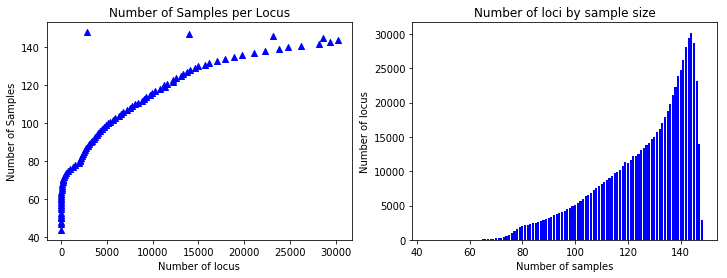

In [60]:
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(121)
ax.scatter(Y, X, marker='^', color='b')
ax.set_xlabel('Number of locus')
ax.set_ylabel('Number of Samples')
ax.set_title('Number of Samples per Locus')

ax = fig.add_subplot(122)
ax.bar(X,Y,color='b')
plt.xlabel('Number of samples')
plt.ylabel('Number of locus')
plt.title('Number of loci by sample size')
plt.show()

/usr/lib/python3.4/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


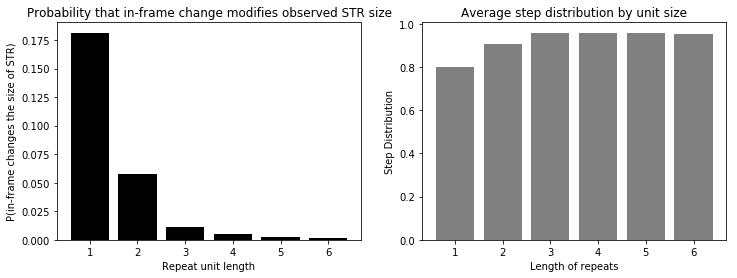

In [70]:
#Stutter model summary
        ## Get distribution of step size for out-of-frame changes and repeat number
STUTTER = "/storage/szfeupe/Runs/GTEx_estr/Stutter_models/stutter_chr"
frames=[]
for C in CHR:
    CH = pd.read_csv(STUTTER + C, sep='\t', header=None)
    frames.append(CH)
STUTTERS = pd.concat(frames)
data = STUTTERS[[0,3,9,4,5]]
HEAD = [ "chrom", "Step_Dist","Repeats","IDOWN","IUP"]
data.columns=HEAD
data['IALL']=data['IUP']+data['IDOWN']
## Aggregate the average distribution by the repeat number
result = data.groupby(['Repeats']).agg({'Step_Dist': lambda x: np.mean(x), 'IDOWN': lambda x: np.mean(x), 'IUP': lambda x: np.mean(x), 'IALL': lambda x: np.mean(x)})


#In-frame changes the size of STR)  P( in-frame changes the size of STR)
fig = plt.figure(figsize=(12,4))

ax = fig.add_subplot(121)
ax.bar(list(result.index),result['IALL'], color='k')
plt.ylabel('P(in-frame changes the size of STR)')
plt.xlabel('Repeat unit length')
plt.title('Probability that in-frame change modifies observed STR size')

##Step Distribution by Length of repeats
ax = fig.add_subplot(122)
plt.bar(list(result.index),result['Step_Dist'], color='grey')
plt.ylabel('Step Distribution')
plt.xlabel('Length of repeats')
plt.title('Average step distribution by unit size')
plt.show()

## Heterozygosity vs. previously reported in SGDP (mgymrek TODO)
